In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics.pairwise import pairwise_distances_argmin
import warnings


def expand(a, b):
    d = (b - a) * 0.05
    return a - d, b + d

In [3]:
warnings.filterwarnings("ignore")  # hmmlearn(0.2.0) < sklearn(0.18)

# 0日期  1开盘  2最高  3最低  4收盘  5成交量  6成交额
x = np.loadtxt('../dataset/SH600000.txt', delimiter='\t', skiprows=2, usecols=(4, 5, 6, 2, 3))
close_price = x[:, 0]
volumn = x[:, 1]
amount = x[:, 2]
amplitude_price = x[:, 3] - x[:, 4]  # 每天的最高价与最低价的差
diff_price = np.diff(close_price)  # 涨跌值
volumn = volumn[1:]  # 成交量
amount = amount[1:]  # 成交额
amplitude_price = amplitude_price[1:]  # 每日振幅
sample = np.column_stack((diff_price, volumn, amount, amplitude_price))  # 观测值
n = 5
model = hmm.GaussianHMM(n_components=n, covariance_type='full')
model.fit(sample)
y = model.predict_proba(sample)
np.set_printoptions(suppress=True)
print y

[[ 0.00000002  0.          0.99999998  0.          0.        ]
 [ 0.00232524  0.          0.99736596  0.00016144  0.00014736]
 [ 0.00089331  0.          0.98987647  0.00920088  0.00002934]
 ..., 
 [ 0.00000004  0.          0.01330361  0.98669635  0.        ]
 [ 0.00000068  0.00066113  0.00070472  0.99863347  0.        ]
 [ 0.00006384  0.00000844  0.00671037  0.99321688  0.00000047]]


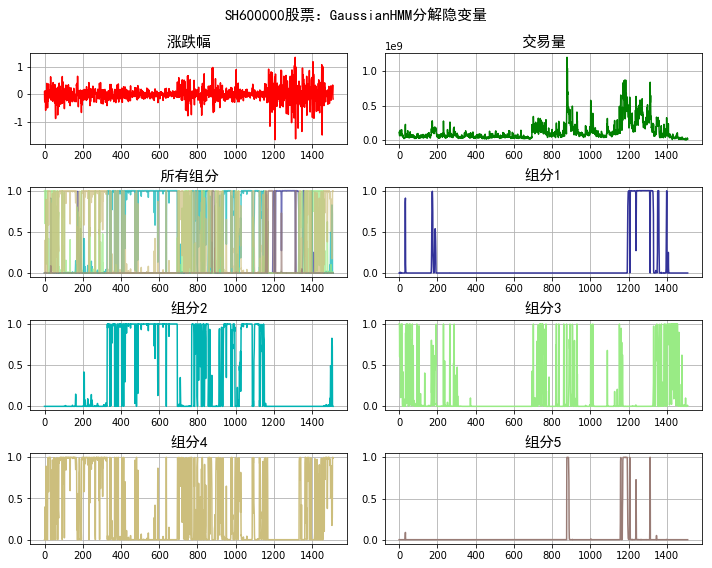

In [4]:
t = np.arange(len(diff_price))
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 8), facecolor='w')
plt.subplot(421)
plt.plot(t, diff_price, 'r-')
plt.grid(True)
plt.title(u'涨跌幅', fontproperties=fontproperties)
plt.subplot(422)
plt.plot(t, volumn, 'g-')
plt.grid(True)
plt.title(u'交易量', fontproperties=fontproperties)

clrs = plt.cm.terrain(np.linspace(0, 0.8, n))
plt.subplot(423)
for i, clr in enumerate(clrs):
    plt.plot(t, y[:, i], '-', color=clr, alpha=0.7)
plt.title(u'所有组分', fontproperties=fontproperties)
plt.grid(True)
for i, clr in enumerate(clrs):
    axes = plt.subplot(4, 2, i + 4)
    plt.plot(t, y[:, i], '-', color=clr)
    plt.title(u'组分%d' % (i + 1), fontproperties=fontproperties)
    plt.grid(True)
plt.suptitle(u'SH600000股票：GaussianHMM分解隐变量', fontsize=18, fontproperties=fontproperties)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()